<a href="https://colab.research.google.com/github/salvatore-juarezh/inteligencia-artificial/blob/main/multikpa/cand_emp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Generar dataset sintético con diferentes rangos por habilidad
#modulos que usaremos
import numpy as np
import pandas as pd

# data set que usaremos como ejemplo
n_muestras = 5000
# Habilidades técnicas: 70-100
tec = np.random.randint(70, 101, (n_muestras, 6))
# Habilidades matemáticas: 60-90
mat = np.random.randint(60, 91, (n_muestras, 6))
# Habilidades psicológicas: 50-85
psi = np.random.randint(50, 86, (n_muestras, 6))
# Nombres de columnas
#abilidades requeridas para buscar al mejor candidato, estas se pueden ajustar para otros ejemplos
columnas = [
    'python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube',
    'estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado',
    'trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas'
]
# Crear DataFrame
df = pd.DataFrame(np.concatenate([tec, mat, psi], axis=1), columns=columnas)
df

,python,sql,visualizacion_datos,excel,manejo_apis,nube,estadistica,probabilidad,algebra_lineal,calculo,optimizacion,modelado,trabajo_equipo,comunicacion,creatividad,adaptabilidad,liderazgo,resolucion_problemas
0,90,95,81,98,86,96,67,88,67,65,87,82,62,75,56,55,77,73
1,93,85,78,85,76,87,86,89,74,85,84,67,78,79,52,62,57,76
2,100,91,82,99,95,78,78,64,64,68,82,74,54,60,52,66,52,77
3,70,88,93,76,80,82,85,68,77,71,60,76,65,53,75,76,84,51
4,76,79,93,93,76,96,64,79,84,85,81,65,67,64,78,53,68,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,84,93,94,81,100,94,90,83,60,86,89,78,55,76,59,65,52,75
4996,93,89,77,81,74,88,66,81,81,61,65,78,80,64,73,52,58,79
4997,86,74,92,87,82,76,62,88,76,70,86,76,51,80,69,65,59,67
4998,77,78,76,73,90,97,66,89,74,89,80,66,56,82,66,58,58,84


In [ ]:
#Obtenemos la etiqueta y
# Calcular promedio por grupo y promedio total
prom_tecnologicas = df[['python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube']].mean(axis=1)
prom_matematicas  = df[['estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado']].mean(axis=1)
prom_psicologicas = df[['trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas']].mean(axis=1)
# Promedio total = promedio de los 3 promedios
prom_total = (prom_tecnologicas + prom_matematicas + prom_psicologicas) / 3
# Etiqueta: 1 = apto si promedio total > 80
y = (prom_total > 75).astype(int)
# one-hot encoding
y = pd.get_dummies(y).values


In [ ]:
#Obtenemos los conjuntos de entrenamiento y de test
#divide datos de prueba y de entrenamieto
from sklearn.model_selection import train_test_split
#divide datos
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42
)

# Escalamiento y normalizadon de datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
## Entrena el escalador con los datos de entrenamiento y los transforma
# fit_transform: calcula media y desviación estándar de X_train y luego aplica la transformación
X_train = scaler.fit_transform(X_train)
## Transforma los datos de prueba usando la misma escala aprendida de X_train
X_test = scaler.transform(X_test)

In [ ]:
#Red neuronal
from tensorflow.keras.models import Sequential # Para crear modelo secuencial (capas una tras otra)
from tensorflow.keras.layers import Dense   # Para crear capas densas (totalmente conectadas)
from tensorflow.keras.optimizers import Adam #optimizador
modelo = Sequential([
    # Primera capa oculta: 64 neuronas, recibe input_shape (número de características)
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    # Segunda capa oculta: 32 neuronas
    Dense(32, activation='relu'),
    #tercera capa oculta
    Dense(16, activation='relu'),
    #capa de salida
    Dense(2, activation='softmax')
])
 #crea el optimizador Adam con tasa de aprendizaje de 0.001
adam = Adam(learning_rate=0.001)
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#entrenamiento
history = modelo.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8033 - loss: 0.3826 - val_accuracy: 0.9490 - val_loss: 0.1226
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9702 - loss: 0.0780 - val_accuracy: 0.9650 - val_loss: 0.0945
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.0517 - val_accuracy: 0.9770 - val_loss: 0.0636
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9908 - loss: 0.0347 - val_accuracy: 0.9710 - val_loss: 0.0648
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9900 - loss: 0.0277 - val_accuracy: 0.9720 - val_loss: 0.0824
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9896 - loss: 0.0241 - val_accuracy: 0.9740 - val_loss: 0.0660
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9927 - loss: 0.0193 - val_accuracy: 0.9740 - val_loss: 0.0720
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9957 - loss: 0.0128 - val_accuracy: 0.

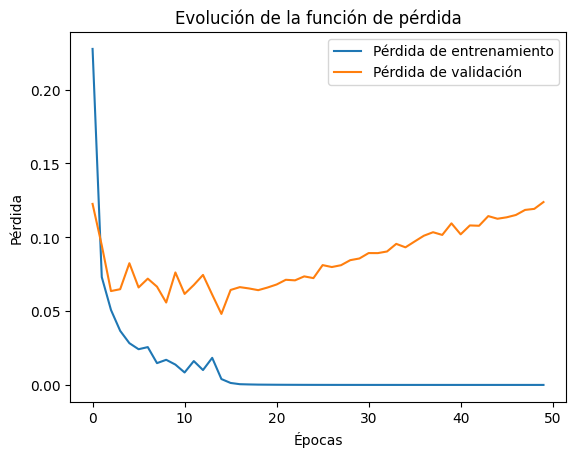

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9825 - loss: 0.1116  

🔹 Loss: 0.1239  |  Accuracy: 0.9810


In [ ]:
#evaluacion
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la función de pérdida')
plt.show()

loss, acc = modelo.evaluate(X_test, y_test)
print(f"\n🔹 Loss: {loss:.4f}  |  Accuracy: {acc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


NameError: name 'plt' is not defined

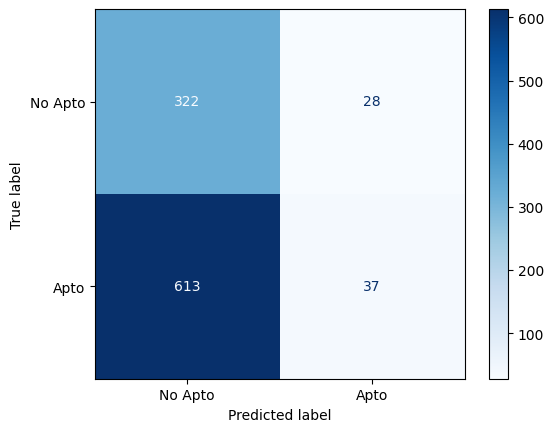

In [ ]:
# @title Texto de título predeterminado
#matriz de confucion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
disp.plot(cmap='Blues')
plt.show()

sensitivity = recall_score(y_true, y_pred, average=None)
print("\nSensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}")
print(f"Apto: {sensitivity[1]:.2f}")

In [ ]:
# @title Texto de título predeterminado
variable_name = "" # @param {"type":"string","placeholder":"fdgfdgdfgdgdfg"}
#evaluar nuevo candidato
nuevo_candidato = np.array([[90, 88, 85, 87, 84, 89,   # técnicas
                             82, 86, 85, 83, 87, 80,   # matemáticas
                             70, 75, 80, 72, 78, 74]]) # psicológicas

nuevo_candidato_scaled = scaler.transform(nuevo_candidato)
pred_nuevo = modelo.predict(nuevo_candidato_scaled)
clase_predicha = np.argmax(pred_nuevo)

print("Evaluación de nuevo candidato:")
print(f"Resultado: {'Apto' if clase_predicha == 1 else 'No Apto'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Evaluación de nuevo candidato:
Resultado: No Apto


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
